## Final Project Submission

Please fill out:
* Student name: Ryan Keats
* Student pace: self paced / part time / full time
* Scheduled project review date/time: July 2nd, 11:59pm
* Instructor name: Hardik Idnani
* Blog post URL:


In [1]:
# Imported any libraries to get started and that may help my coding along the way
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Loaded the original dataframe 
df1 = pd.read_csv("data/kc_house_data.csv")
# Set the display format for the easier reading of larger numbers
pd.options.display.float_format = '{:,.0f}'.format
# Displaying .head() function which returns the first 5 rows of the dataframe 
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900",3,1,1180,5650,1,NaN,0,...,7,1180,0.0,1955,0,98178,48,-122,1340,5650
1,6414100192,12/9/2014,"538,000",3,2,2570,7242,2,0,0,...,7,2170,400.0,1951,"1,991",98125,48,-122,1690,7639
2,5631500400,2/25/2015,"180,000",2,1,770,10000,1,0,0,...,6,770,0.0,1933,NaN,98028,48,-122,2720,8062
3,2487200875,12/9/2014,"604,000",4,3,1960,5000,1,0,0,...,7,1050,910.0,1965,0,98136,48,-122,1360,5000
4,1954400510,2/18/2015,"510,000",3,2,1680,8080,1,0,0,...,8,1680,0.0,1987,0,98074,48,-122,1800,7503


In [3]:
# Sorted the 'price' column from highest to lowest
sorted_df1 = df1.sort_values('price', ascending=False)
# Displaying .head() function
sorted_df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,"7,700,000",6,8,12050,27600,2,0,3,...,13,8570,3480.0,1910,"1,987",98102,48,-122,3940,8800
3910,9808700762,6/11/2014,"7,060,000",5,4,10040,37325,2,1,2,...,11,7680,2360.0,1940,"2,001",98004,48,-122,3930,25449
9245,9208900037,9/19/2014,"6,890,000",6,8,9890,31374,2,0,4,...,13,8860,1030.0,2001,0,98039,48,-122,4540,42730
4407,2470100110,8/4/2014,"5,570,000",5,6,9200,35069,2,0,0,...,13,6200,3000.0,2001,NaN,98039,48,-122,3560,24345
1446,8907500070,4/13/2015,"5,350,000",5,5,8000,23985,2,0,4,...,12,6720,1280.0,2009,0,98004,48,-122,4600,21750


In [4]:
# Returns each column in the original df1
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Retruns the data types of each column from the original df1
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# Returns the count of each unique values for each column from the original dataframe 
df1.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [7]:
# Returns comprehensive information of the original df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
# Checking for any duplicated data from the original dataframe 
duplicates = df1.duplicated()
if duplicates.any():
    print("There are duplicated values in the DataFrame.")
else:
    print("There are no duplicated values in the DataFrame.")
print(duplicates.value_counts())
# Count the number of duplicate rows
duplicate_count = df1.duplicated().sum()
# Display the count
print(f"Number of duplicate rows: {duplicate_count}")

There are no duplicated values in the DataFrame.
False    21597
dtype: int64
Number of duplicate rows: 0


In [9]:
# Returns the presence of missing values (NaN) as a boolean dataframe 
# Also displaying .head() function 
df1.isna().head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Returns a count of the missing values (NaN) in each column of the original DataFrame
df1.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
# Returns a descriptive analysis of the original dataframe
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,597","21,597","21,597","21,597","21,597","21,597","21,597","19,221","21,534","21,597","21,597","21,597","21,597","17,755","21,597","21,597","21,597","21,597","21,597"
mean,"4,580,474,288","540,297",3,2,"2,080","15,099",1,0,0,3,8,"1,789","1,971",84,"98,078",48,-122,"1,987","12,758"
std,"2,876,735,716","367,368",1,1,918,"41,413",1,0,1,1,1,828,29,400,54,0,0,685,"27,274"
min,"1,000,102","78,000",1,0,370,520,1,0,0,1,3,370,"1,900",0,"98,001",47,-123,399,651
25%,"2,123,049,175","322,000",3,2,"1,430","5,040",1,0,0,3,7,"1,190","1,951",0,"98,033",47,-122,"1,490","5,100"
50%,"3,904,930,410","450,000",3,2,"1,910","7,618",2,0,0,3,7,"1,560","1,975",0,"98,065",48,-122,"1,840","7,620"
75%,"7,308,900,490","645,000",4,2,"2,550","10,685",2,0,0,4,8,"2,210","1,997",0,"98,118",48,-122,"2,360","10,083"
max,"9,900,000,190","7,700,000",33,8,"13,540","1,651,359",4,1,4,5,13,"9,410","2,015","2,015","98,199",48,-121,"6,210","871,200"


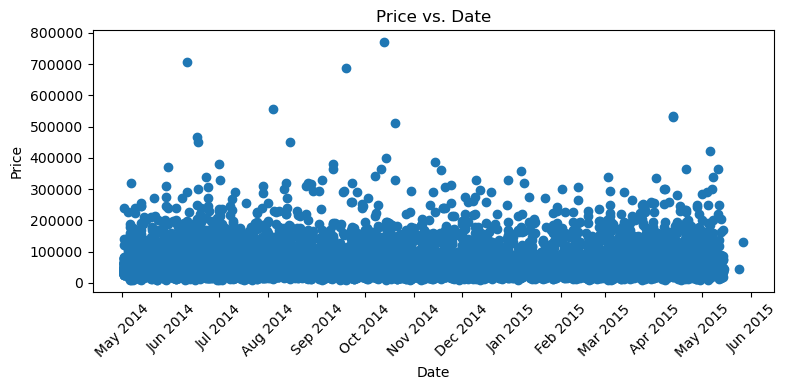

In [12]:
# Loaded the original dataframe and adjusted the price column 
df1 = pd.read_csv('data/kc_house_data.csv')
df1['price'] = df1['price'] / 10
# Converted the date column to datetime format
df1['date'] = pd.to_datetime(df1['date'])
# Created the scatter plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(df1['date'], df1['price'])
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Price vs. Date')
# Set x-axis tick locator and format
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

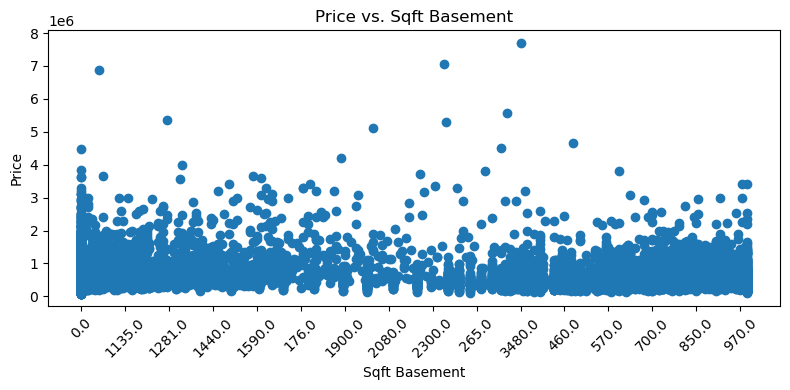

In [13]:
# Loaded the original dataframe & sort values from sqft_basement
df1 = pd.read_csv('data/kc_house_data.csv')
df1_sorted = df1.sort_values('sqft_basement')
# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(df1_sorted['sqft_basement'], df1_sorted['price'])
ax.set_xlabel('Sqft Basement')
ax.set_ylabel('Price')
ax.set_title('Price vs. Sqft Basement')
# Set the number of desired intervals
num_intervals = 22
# Set x-axis tick locator for the desired number of intervals
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_intervals))
# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

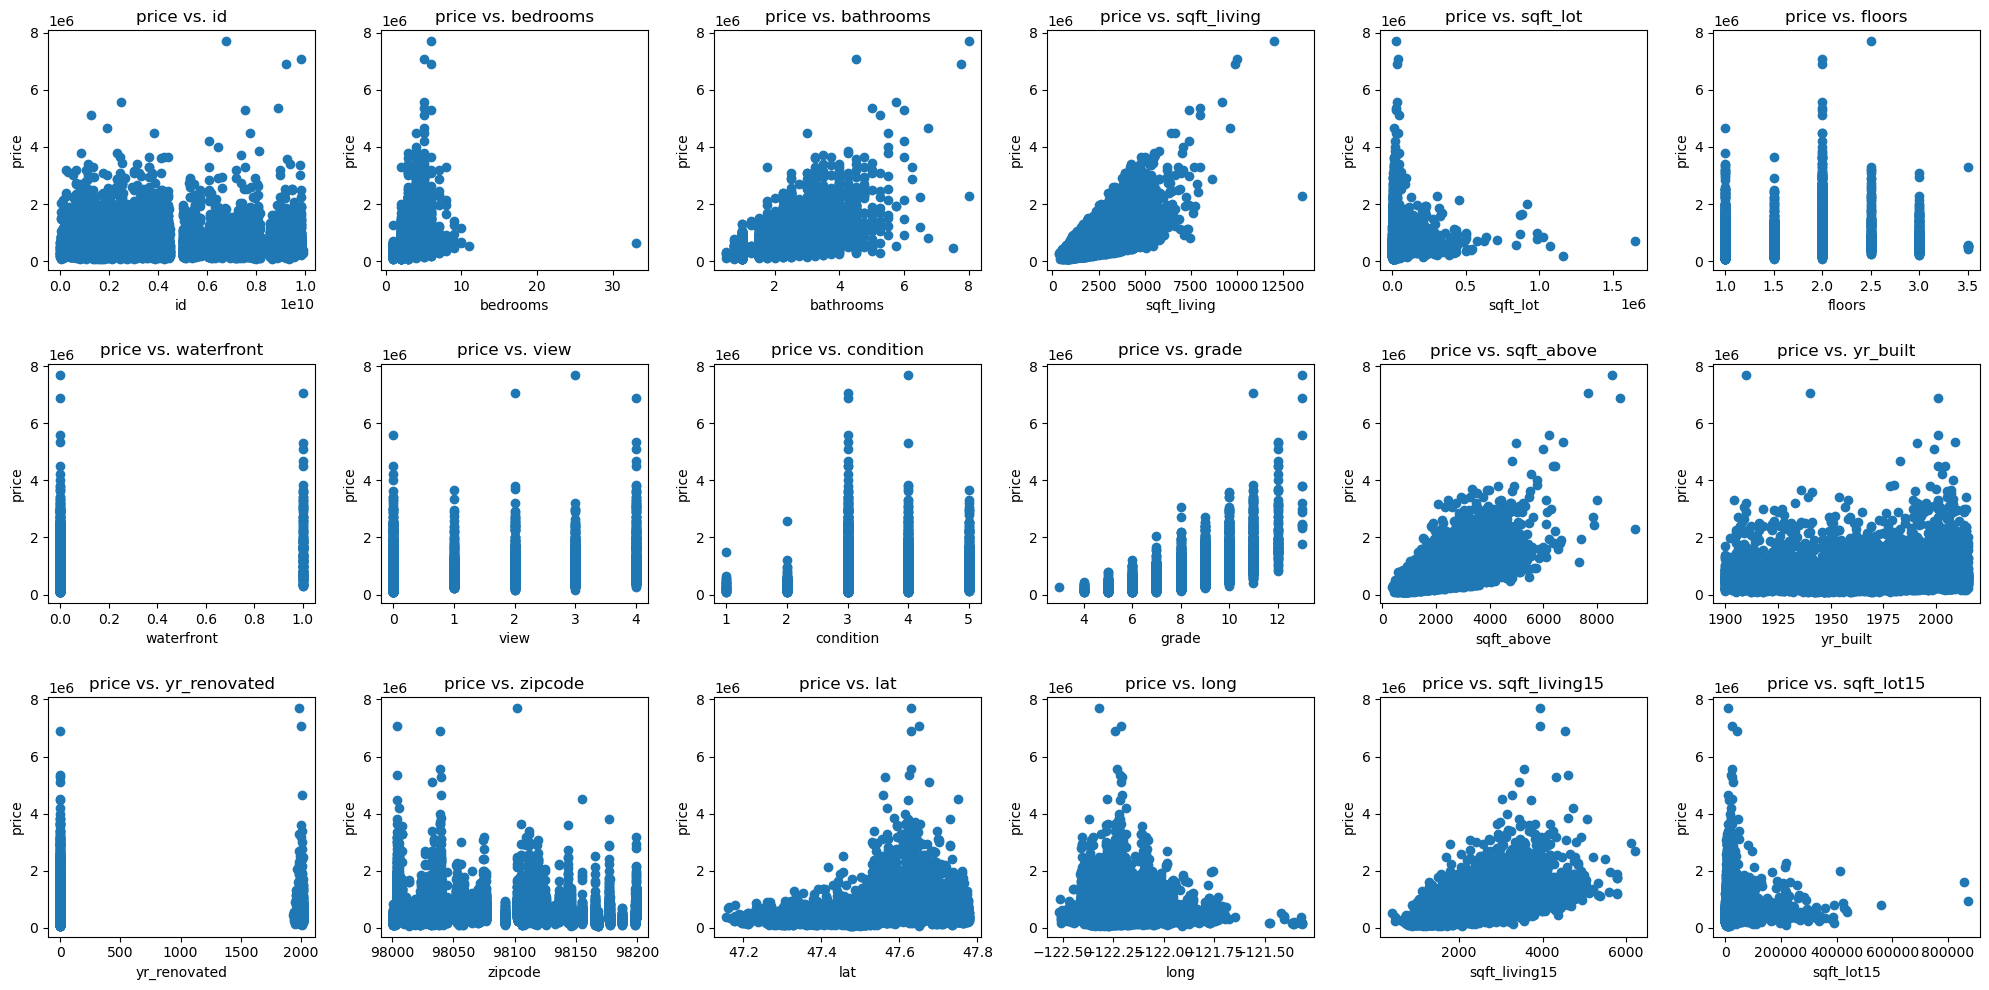

In [14]:
# Loaded the original dataframe
df1 = pd.read_csv('data/kc_house_data.csv')
# Set my Dependent variable
dependent_variable = 'price'
# Independent variables (I have removed 'date' & 'sqft_basement' as they were not readable on the axis of the plots)
independent_variables = ['id', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors', 
                         'waterfront', 'view', 'condition','grade', 'sqft_above', 'yr_built',
                         'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15','sqft_lot15']
# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 10))
axes = axes.flatten()
# Create scatter plots for each independent variable
for i, independent_var in enumerate(independent_variables):
    axes[i].scatter(df1[independent_var], df1[dependent_variable])
    axes[i].set_xlabel(independent_var)
    axes[i].set_ylabel(dependent_variable)
    axes[i].set_title(f'{dependent_variable} vs. {independent_var}')
# Adjusted spacing between subplots
fig.tight_layout()
# Display the plots
plt.show()

In [15]:
# Cleaning dataframe by removing unwanted columns, removing NaN & outliers 
# Load the original dataset
df1 = pd.read_csv('data/kc_house_data.csv')
# Replace '?' values with NaN
df1.replace('?', np.nan, inplace=True)
# Drop rows with missing values
df1.dropna(inplace=True)
# Specify the columns to remove
cols_to_remove = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 
                  'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
# Drop the specified columns
df2 = df1.drop(columns=cols_to_remove)
# Specify the new filename
new_filename = 'data/cleaned_data.csv'
# Save the cleaned dataset as the new CSV file
df2.to_csv(new_filename, index=False)
# Display the updated dataframe after removing columns and outliers
df2.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,"538,000",3,2,2570,7242,2,0,3,7,1951
3,2487200875,"604,000",4,3,1960,5000,1,0,5,7,1965
4,1954400510,"510,000",3,2,1680,8080,1,0,3,8,1987
5,7237550310,"1,230,000",4,4,5420,101930,1,0,3,11,2001
8,2414600126,"229,500",3,1,1780,7470,1,0,3,7,1960


In [16]:
# Returns each column from the updated df2
df2.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

In [17]:
# Returns shape of the updated df2
df2.shape

(15429, 11)

In [18]:
# Returns the data types of each column from the updated df2
df2.dtypes

id               int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront     float64
condition        int64
grade            int64
yr_built         int64
dtype: object

In [19]:
# Returns the count of each unique value for each column from the updated df2
df2.nunique()

id             15346
price           3006
bedrooms          12
bathrooms         27
sqft_living      905
sqft_lot        7805
floors             6
waterfront         2
condition          5
grade             11
yr_built         116
dtype: int64

In [20]:
# Returns comprehensive information of the updated df2_cleaned
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           15429 non-null  int64  
 1   price        15429 non-null  float64
 2   bedrooms     15429 non-null  int64  
 3   bathrooms    15429 non-null  float64
 4   sqft_living  15429 non-null  int64  
 5   sqft_lot     15429 non-null  int64  
 6   floors       15429 non-null  float64
 7   waterfront   15429 non-null  float64
 8   condition    15429 non-null  int64  
 9   grade        15429 non-null  int64  
 10  yr_built     15429 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.4 MB


In [21]:
# Returns a descriptive analysis of the updated df2
df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,"15,429","15,429","15,429","15,429","15,429","15,429","15,429","15,429","15,429","15,429","15,429"
mean,"4,593,824,663","541,498",3,2,"2,086","15,286",1,0,3,8,"1,971"
std,"2,874,790,996","373,022",1,1,920,"41,997",1,0,1,1,29
min,"1,000,102","82,000",1,0,370,520,1,0,1,3,"1,900"
25%,"2,126,049,032","320,000",3,2,"1,430","5,050",1,0,3,7,"1,952"
50%,"3,905,081,800","450,000",3,2,"1,920","7,620",2,0,3,7,"1,975"
75%,"7,334,501,250","643,500",4,2,"2,550","10,720",2,0,4,8,"1,997"
max,"9,895,000,040","7,700,000",33,8,"13,540","1,651,359",4,1,5,13,"2,015"


In [22]:
# DataFrame is called df2 and the column I wanted to analyze is 'waterfront'
column_data_bool = df2['waterfront'].map({0: False, 1: True})
# Print the converted column data
column_data_bool
# Find the count of False and True values
value_counts = column_data_bool.value_counts()
# Display the count of False and True values
value_counts

False    15313
True       116
Name: waterfront, dtype: int64

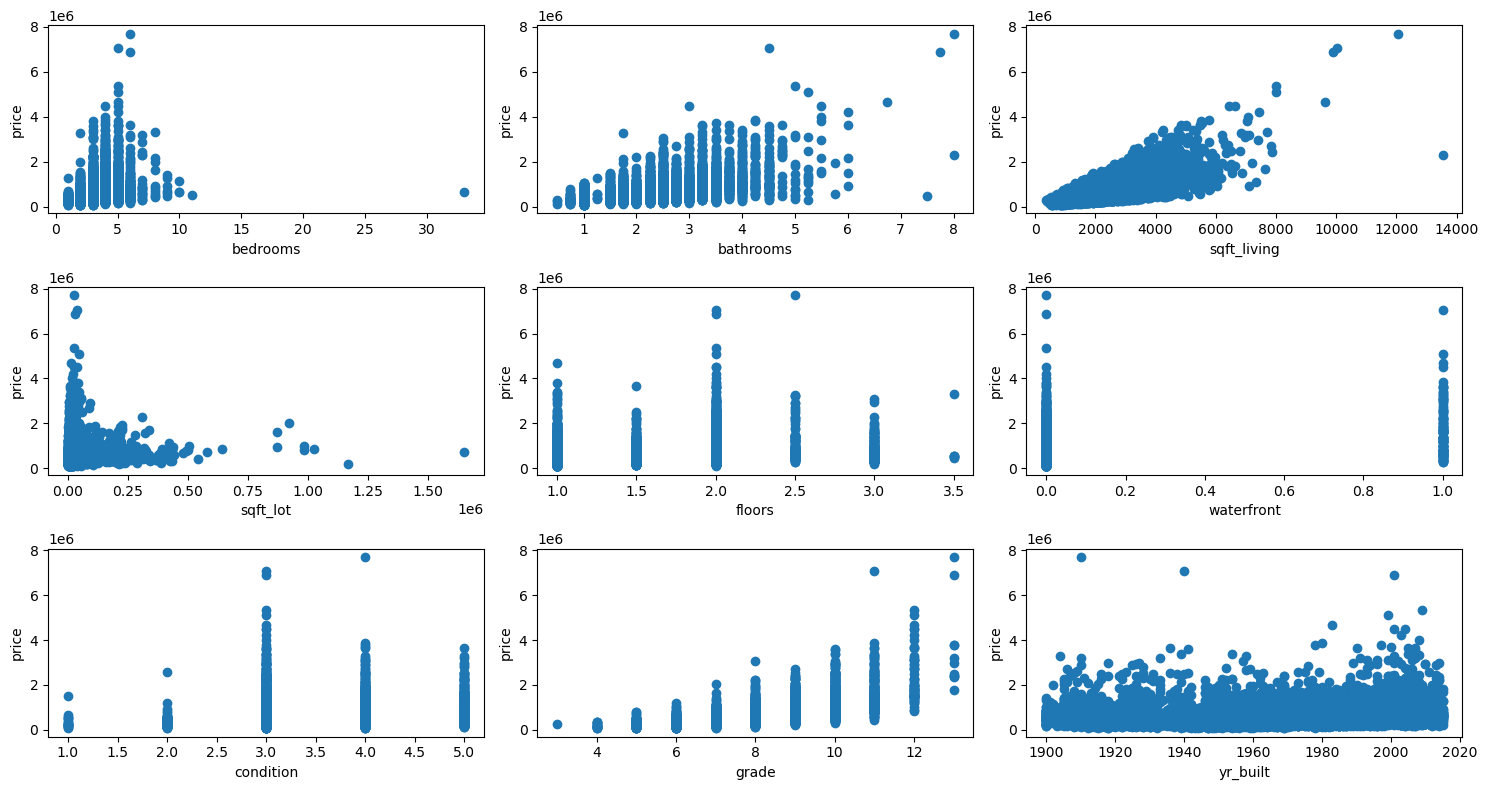

In [23]:
# Build scatter plots for each independent variable
ind_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']
dep_var = 'price'
# Set the size of the overall figure
plt.figure(figsize=(15, 8))  
for i, var in enumerate(ind_vars, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df2[var], df2[dep_var])
    plt.xlabel(var)
    plt.ylabel(dep_var)
# Adjust the spacing between subplots
plt.tight_layout()
# Display the plots 
plt.show()

In [24]:
import statsmodels.api as sm
# Loaded my dataframe
df2 = pd.read_csv('data/cleaned_data.csv')
# Define the dependent variable
y = df2['price']
# Define the independent variables 
X = df2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade']]
# Add a constant term to the independent variables matrix
X = sm.add_constant(X)
# Create the OLS model
model = sm.OLS(y, X)
# Fit the model to the data
results = model.fit()
# Display the summary of the regression results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2804.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:00:03   Log-Likelihood:            -2.1350e+05
No. Observations:               15429   AIC:                         4.270e+05
Df Residuals:                   15421   BIC:                         4.271e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.066e+05    2.2e+04    -32.150      0.000    -7.5e+05   -6.64e+05
bedrooms    -4.731e+04   2699.366    -17.526      0.000   -5.26e+04    -4.2e+04
bathrooms   -1.178e+04   4388.222     -2.685      0.007   -2.04e+04   -3179.229
sqft_living   232.6165      4.318     53.867      0.000     224.152     241.081
sqft_lot       -0.3396      0.048     -7.007      0.000      -0.435      -0.245
floors      -2.256e+04   4539.976     -4.968      0.000   -3.15e+04   -1.37e+04
condition    6.142e+04   3186.455     19.274      0.000    5.52e+04    6.77e+04
grade        1.014e+05   2837.149     35.745      0.000    9.59e+04    1.07e+05
==============================================================================
Omnibus:                    12215.448   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           773399.758
Skew:                           3.319   Prob(JB):                         0.00
Kurtosis:                      37.044   Cond. No.                     4.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [26]:
# Coefficients
linreg.coef_

array([ 0.00000000e+00, -4.73077945e+04, -1.17806617e+04,  2.32616536e+02,
       -3.39591337e-01, -2.25556164e+04,  6.14170699e+04,  1.01414464e+05])

In [27]:
# Intercept
linreg.intercept_

-706644.8563373213

In [28]:
# My documentation of the coefficients on my baseline model 

# Each additional bedroom is associated with a decrease in price by approximately $47,310.
# Each additional bathroom is associated with a decrease in price by approximately $11,780.
# A one unit (square feet) increase in the living is associated with an increase in price by approximately $232.62.
# A one unit (square feet) increase in the lot size is associated with a decrease in price by approximately $0.34.
# Each additional floor is associated with a decrease in price by approximately $22,560.
# A one unit increase in the condition rating is associated with an increase in price by approximately $61,420.
# A one unit increase in the grade rating is associated with an increase in price by approximately $101,400.

# The unrealistic or contradictory coefficients in my baseline model indicate the need for improvement. 
# By refining the model through additonal steps and iterations a more accurate coefficient estimate can be obtained 
# to align with the true relationships between the variables. 

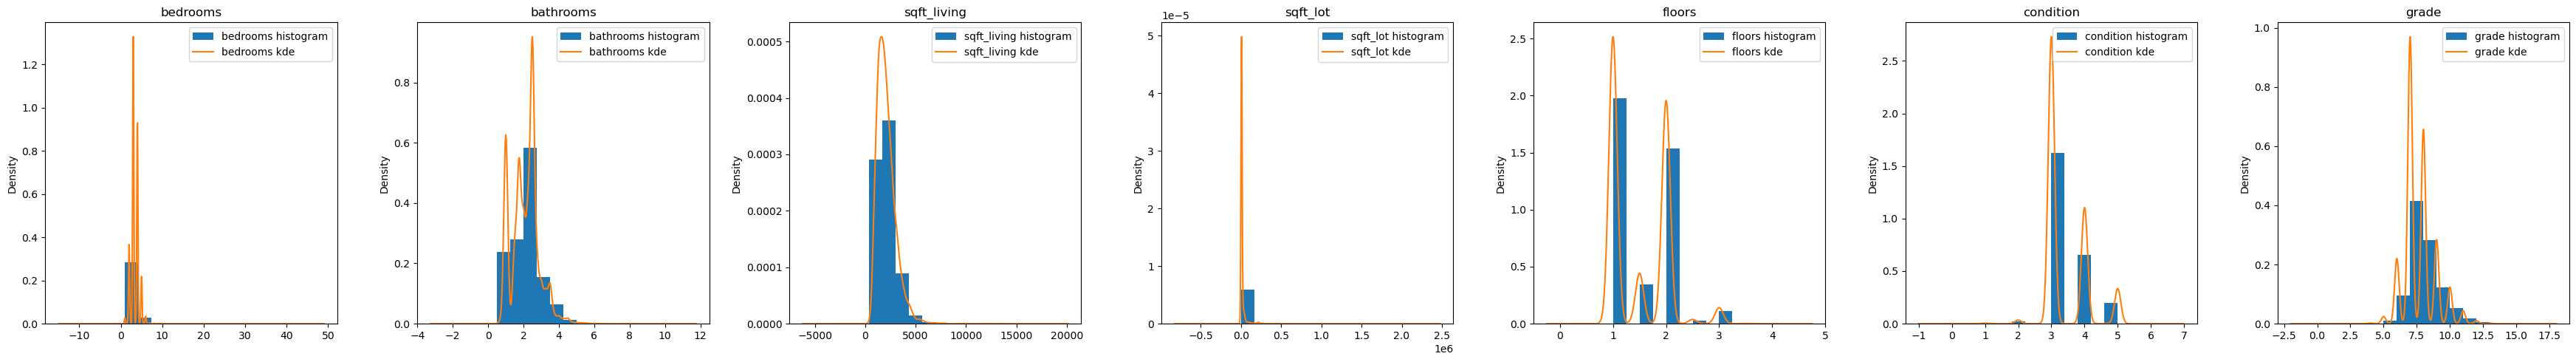

In [29]:
import scipy.stats as stats
import matplotlib.pyplot as plt
# Load my dataframe
df2 = pd.read_csv('data/cleaned_data.csv')
# Define my independent variables
independent_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade']
# Create subplots for each independent variable
fig, axs = plt.subplots(1, len(independent_variables), figsize=(5 * len(independent_variables), 5))
# Iterate over each independent variable
for i, var in enumerate(independent_variables):
    ax = axs[i]
 # Histogram with KDE
    df2[var].plot.hist(density=True, ax=ax, label=var + ' histogram')
    df2[var].plot.kde(ax=ax, label=var + ' kde')
    ax.legend()
    ax.set_title(var)
# Adjust spacing of subplots
plt.tight_layout()
# Display the plots
plt.show()

In [30]:
# Recording my observations here 

# No variable is anywhere near showing a normal distribution.
# We see different examples of major skews in the in all the predictors, 
# which could be very challenging towards analysis. 

# One positive of the large variances seen, is that I am yet to take out the outliers and also the coeffcients 
# I documented earlier were so strange. Which is good that there is no normal distribution for the unrealistic coeffcients 
# displayed earlier on from my baseline summary. 

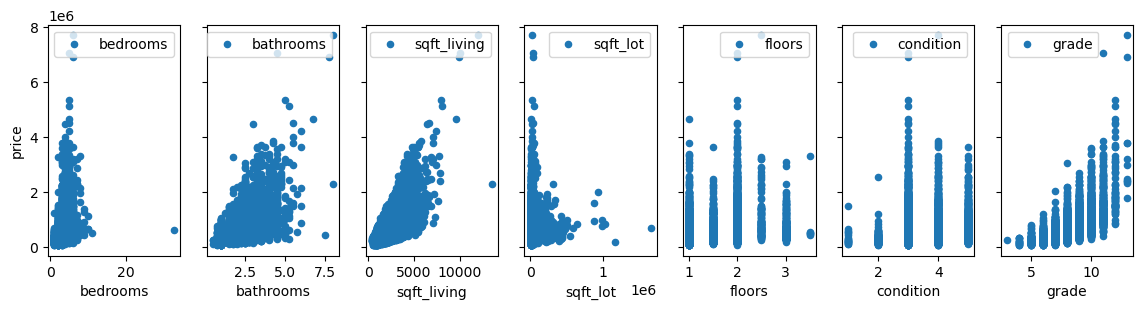

In [31]:
# Visualizing the relationship between the predictors and the target using scatterplots
fig, axs = plt.subplots(1, 7, sharey=True, figsize=(14, 3))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade']):
    df2.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

In [32]:
# Recording my observations on linearity here 

# Bathrooms & sqft_living are the closest to being a good features at this stage in showing any resemblance 
# of a prositive linear relationship.

# Bedrooms & sqft_lot are the next closest to show any resemblance of a positive linear relationship 
# but still have far too much variance and outliers to suggest either are good predictors yet. 

# Floors, grade & condition variables generate parallel lines in a scatter plot which suggest 
# the presence of a non linear relationship or interaction between variables.
# Indicating a violation of the linearity assumption in regression analysis.

In [33]:
# Building the formula 
f = 'price~bathrooms'
# Create a fitted model in one line
model = smf.ols(formula=f, data=df2).fit()

In [34]:
# Displaying model summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     5890.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:00:11   Log-Likelihood:            -2.1734e+05
No. Observations:               15429   AIC:                         4.347e+05
Df Residuals:                   15427   BIC:                         4.347e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -839.4838   7514.121     -0.112      0.911   -1.56e+04    1.39e+04
bathrooms   2.556e+05   3330.873     76.748      0.000    2.49e+05    2.62e+05
==============================================================================
Omnibus:                    12851.924   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           769766.745
Skew:                           3.630   Prob(JB):                         0.00
Kurtosis:                      36.833   Cond. No.                         7.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Recording my observations on "Goodness of fit" here

# The R-squared value is low at 0.276, indicating that only about 27.6% of the variability in "price" 
# can be explained by the variables in the model.

# The intercept is estimated to be -839, which may not hold practical significance 
# due to negative prices being nonsensical.
# The Intercept tells us that for each additional bathroom, the estimated increase in price
# is approximately $255,600, assuming all other variables remain constant.

   bathrooms
0          0
1          8
0     126,979
1   2,044,261
dtype: float64


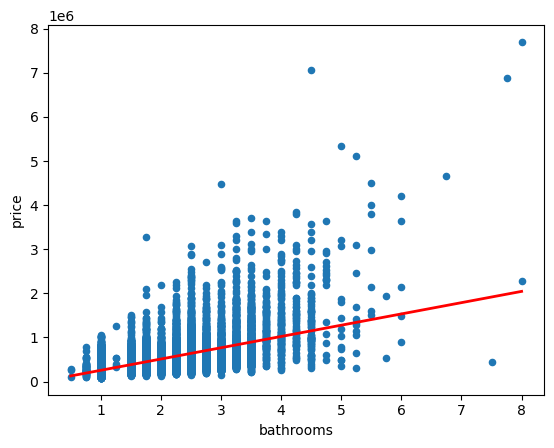

In [36]:
# Create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'bathrooms': [df2.bathrooms.min(), df2.bathrooms.max()]})
print(X_new.head())
# make predictions for those x values and store them
preds = model.predict(X_new)
print (preds)
# first, plot the observed data and the least squares line
df2.plot(kind='scatter', x='bathrooms', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

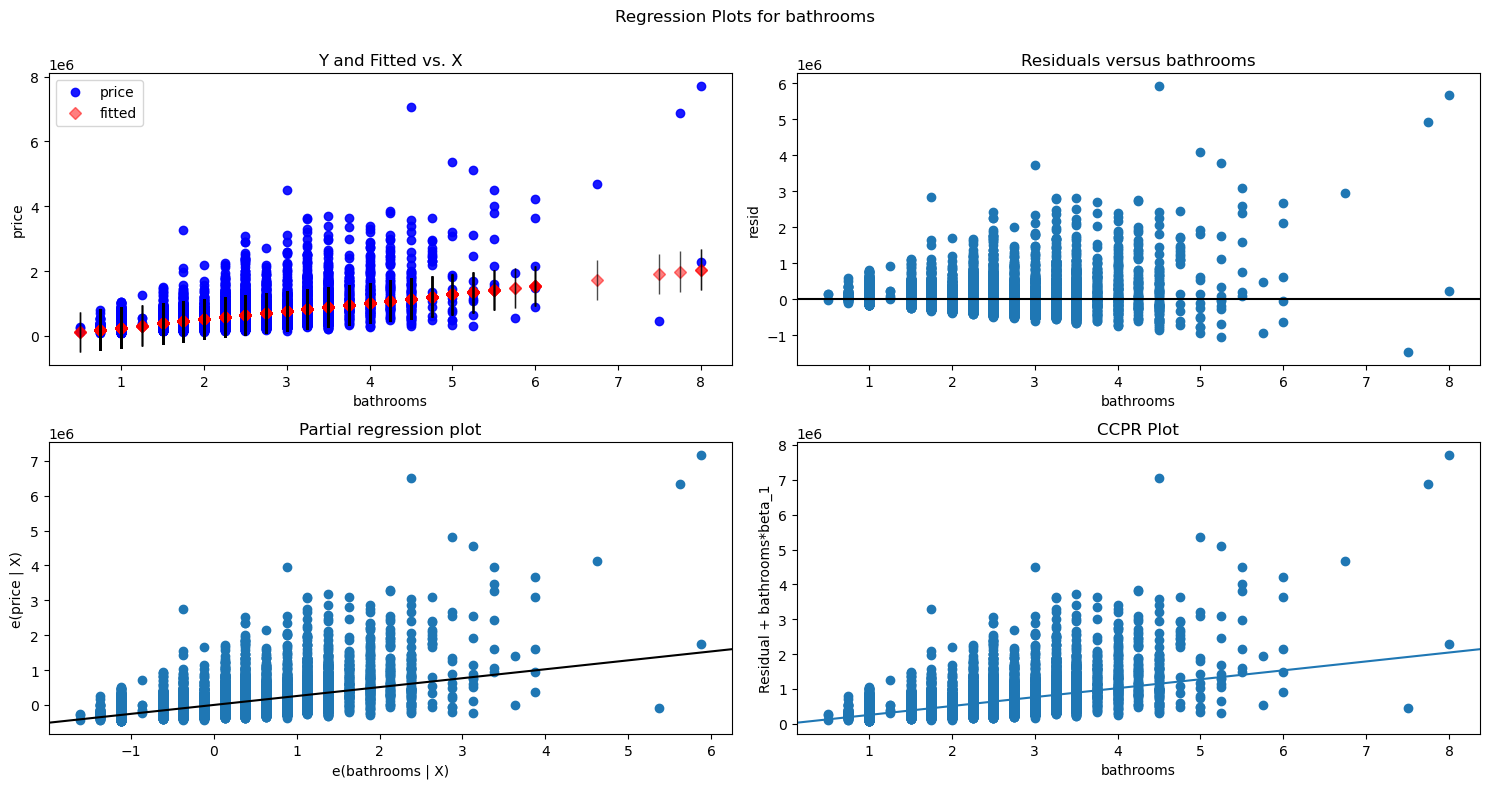

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()

In [38]:
# Recording my observations on heteroscedasticity

# From the all the plots, we see a cone shapes which is a sign of heteroscedasticity. 
# Which is telling us that the residuals are heteroscedastic. This violates an assumption.

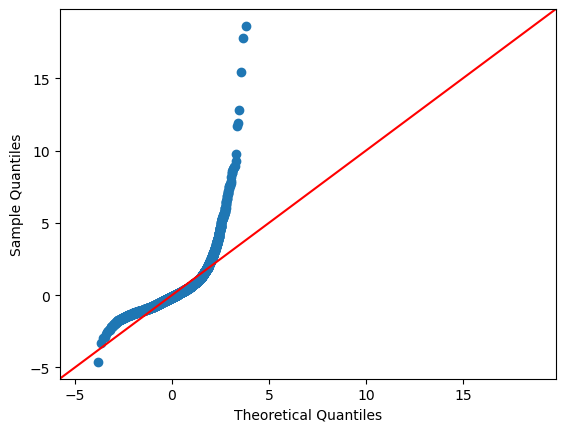

In [39]:
import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [40]:
# Recording my observations on the normality assumption

# My QQ plot here follows the line somewhat initially and then becomes vertical,
# indicating heavy tailed distribution or the presence of extreme outliers.
# The skewness positive or negative can't be determined solely based on this pattern. 

# Again, the only positive I take is that I am yet to remove the outliers which corresponds with this plots display. 

R-Squared: 0.0935087297672601
Intercept   128,946
bedrooms    122,101
dtype: float64


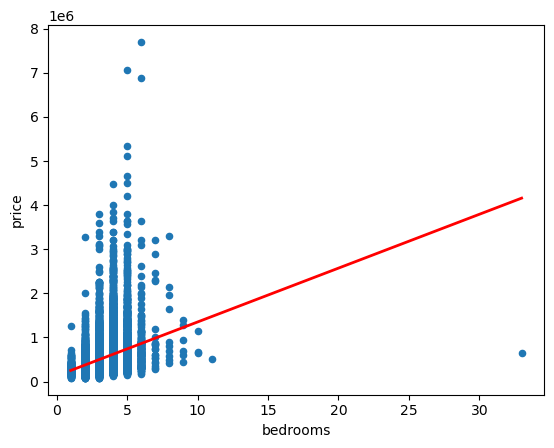

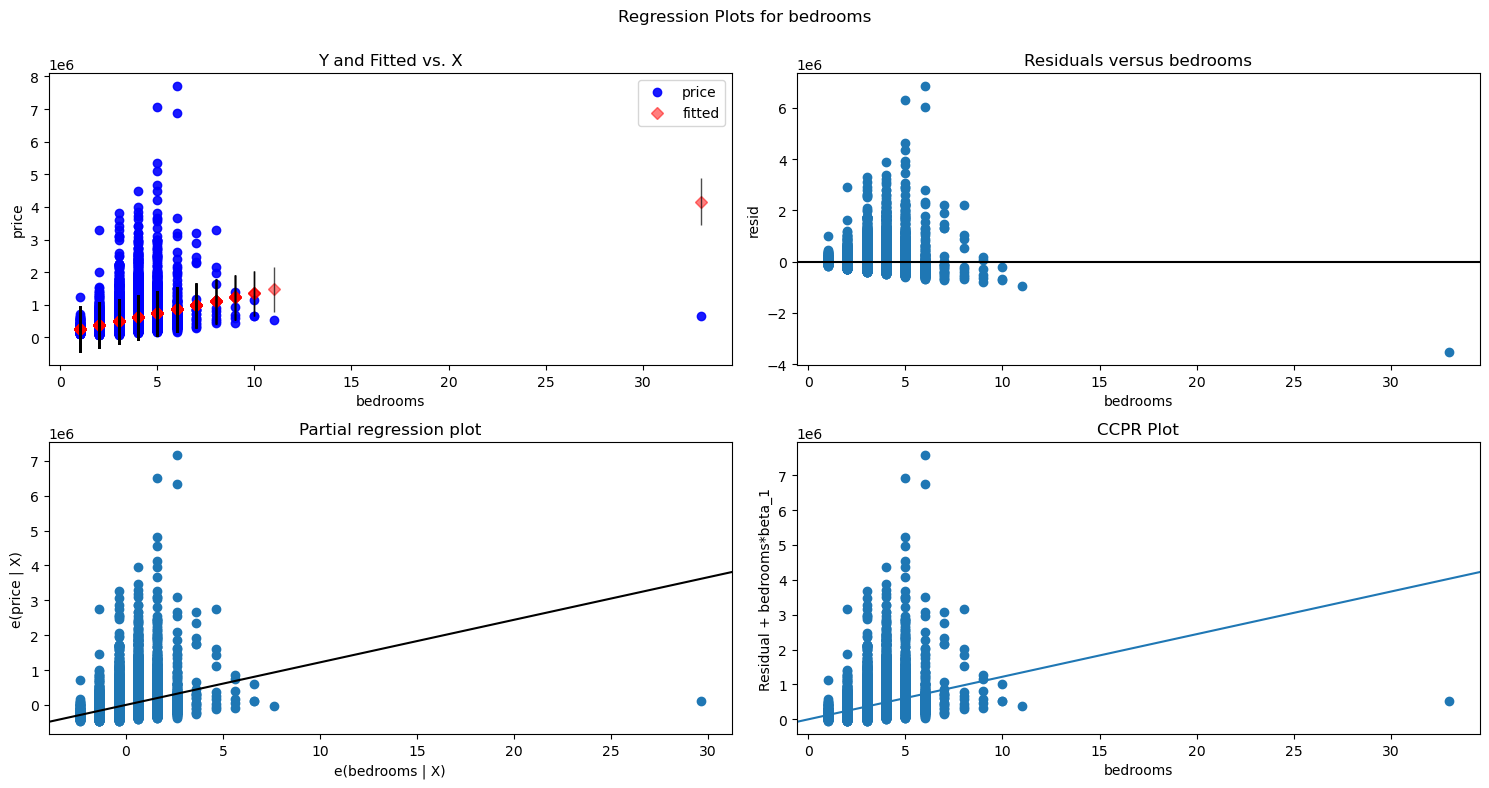

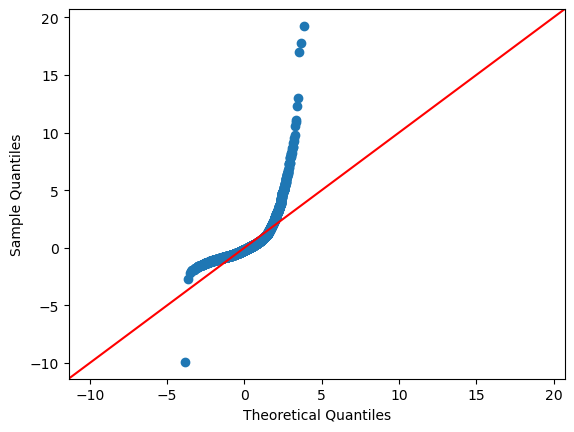

In [41]:
f = 'price~bedrooms'
model = smf.ols(formula=f, data=df2).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'bedrooms': [df2.bedrooms.min(), df2.bedrooms.max()]});
preds = model.predict(X_new)
df2.plot(kind='scatter', x='bedrooms', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [42]:
# Displaying model summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     1591.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:00:16   Log-Likelihood:            -2.1908e+05
No. Observations:               15429   AIC:                         4.382e+05
Df Residuals:                   15427   BIC:                         4.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.289e+05   1.07e+04     12.018      0.000    1.08e+05     1.5e+05
bedrooms    1.221e+05   3060.803     39.892      0.000    1.16e+05    1.28e+05
==============================================================================
Omnibus:                    14019.750   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1052635.207
Skew:                           4.107   Prob(JB):                         0.00
Kurtosis:                      42.622   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Recording my observations here for goodness of fit 


# As a predictor, Bedrooms performs worse than Bathrooms. 
# Bedrooms has higher amount of skewness and kurtosis than Bathrooms. After running the model, it also became clear that 
# the residuals QQ plot looks off, so the normality assumption is not fulfilled.
# An extremely low R-squared explaining only 9.4% of variance in the target variable.
# The intercept of approximately $128,900 represents the estimated price of a house when the number of bedrooms is 0,
# while each additional bedroom is associated with an average price increase of approximately $122,100.

# There appears to be heteroscedasticity in bedrooms as was the case of bathrooms. 

In [44]:
# Based on the analysis, it can be concluded that the variables "bedrooms" and "bathrooms" have a moderate 
# to low impact on the price, explaining only around 27% and 10% of the variability, respectively. 
# While these percentages indicate some level of influence, further investigation is required 
# to assess other model assumptions and potential issues. 

In [45]:
df2.shape

(15429, 11)

In [46]:
# Load your dataset into a pandas DataFrame
df2 = pd.read_csv('data/cleaned_data.csv')
# Calculate z-scores for each column
z_scores = np.abs((df2 - df2.mean()) / df2.std())
# Set a threshold for outlier detection (e.g., z-score > 3)
threshold = 3
# Remove rows with outlier values
df2_cleaned = df2[(z_scores < threshold).all(axis=1)]
# Display the head of the cleaned DataFrame
print("Head of the cleaned DataFrame:")
# Display the new shape of the cleaned DataFrame
print("New shape of the cleaned DataFrame:")
print(df2_cleaned.shape)
# Save the cleaned DataFrame to a new CSV file
df2_cleaned.to_csv('data/cleaned_data_outliers_removed.csv', index=False)
# Display new dataframe 
df2_cleaned.head()

Head of the cleaned DataFrame:
New shape of the cleaned DataFrame:
(14634, 11)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,6414100192,"538,000",3,2,2570,7242,2,0,3,7,1951
1,2487200875,"604,000",4,3,1960,5000,1,0,5,7,1965
2,1954400510,"510,000",3,2,1680,8080,1,0,3,8,1987
4,2414600126,"229,500",3,1,1780,7470,1,0,3,7,1960
5,3793500160,"323,000",3,2,1890,6560,2,0,3,7,2003


In [47]:
# Create a dictionary with the dummy values
dummy_data ={
    'Bedrooms': [0, 1, 2,'3+'],
    'Bathrooms': [0, 1, 2, '3+'],
    'Floors': [0, 1, 2, '3+'],
    'Condition': ['Poor','Average', 'Good', 'Excellent'],
    'Grade': ['Low', 'Average', 'High', 'Excellent']}
# Create a DataFrame from the dummy data
df = pd.DataFrame(dummy_data)
# Generate the dummy variables using pandas get_dummies function
df_dummies = pd.get_dummies(df, drop_first=True)

In [48]:
# Perform one-hot encoding on the categorical columns
df_dummies_encoded = pd.get_dummies(df_dummies)
# Print the encoded DataFrame
df_dummies_encoded.head()

,Bedrooms_1,Bedrooms_2,Bedrooms_3+,Bathrooms_1,Bathrooms_2,Bathrooms_3+,Floors_1,Floors_2,Floors_3+,Condition_Excellent,Condition_Good,Condition_Poor,Grade_Excellent,Grade_High,Grade_Low
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0


In [49]:
# Initialize an empty DataFrame to store the derived variables
derived_df = pd.DataFrame()
# Derive new variables by aggregating dummy variables within each category
derived_df['total_bedrooms'] = df_dummies[['Bedrooms_1', 'Bedrooms_2', 'Bedrooms_3+']].sum(axis=1)
derived_df['total_bathrooms'] = df_dummies[['Bathrooms_1', 'Bathrooms_2', 'Bathrooms_3+']].sum(axis=1)
derived_df['total_floors'] = df_dummies[['Floors_1', 'Floors_2', 'Floors_3+']].sum(axis=1)
derived_df['total_condition'] = df_dummies[['Condition_Poor', 'Condition_Good', 'Condition_Excellent']].sum(axis=1)
derived_df['total_grade'] = df_dummies[['Grade_Low', 'Grade_High', 'Grade_Excellent']].sum(axis=1)
# Display the derived DataFrame
derived_df.head()

,total_bedrooms,total_bathrooms,total_floors,total_condition,total_grade
0,0,0,0,1,1
1,1,1,1,0,0
2,1,1,1,1,1
3,1,1,1,1,1


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 999
df2_cleaned = pd.read_csv('data/cleaned_data_outliers_removed.csv')
numeric_vars = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built']

In [51]:
df2_cleaned_preprocessed = df2_cleaned.loc[:,numeric_vars]
df2_cleaned_preprocessed.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,6414100192,"538,000",3,2,2570,7242,2,0,3,7,1951
1,2487200875,"604,000",4,3,1960,5000,1,0,5,7,1965
2,1954400510,"510,000",3,2,1680,8080,1,0,3,8,1987
3,2414600126,"229,500",3,1,1780,7470,1,0,3,7,1960
4,3793500160,"323,000",3,2,1890,6560,2,0,3,7,2003


/Users/admin/Downloads/anaconda3/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/admin/Downloads/anaconda3/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/admin/Downloads/anaconda3/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


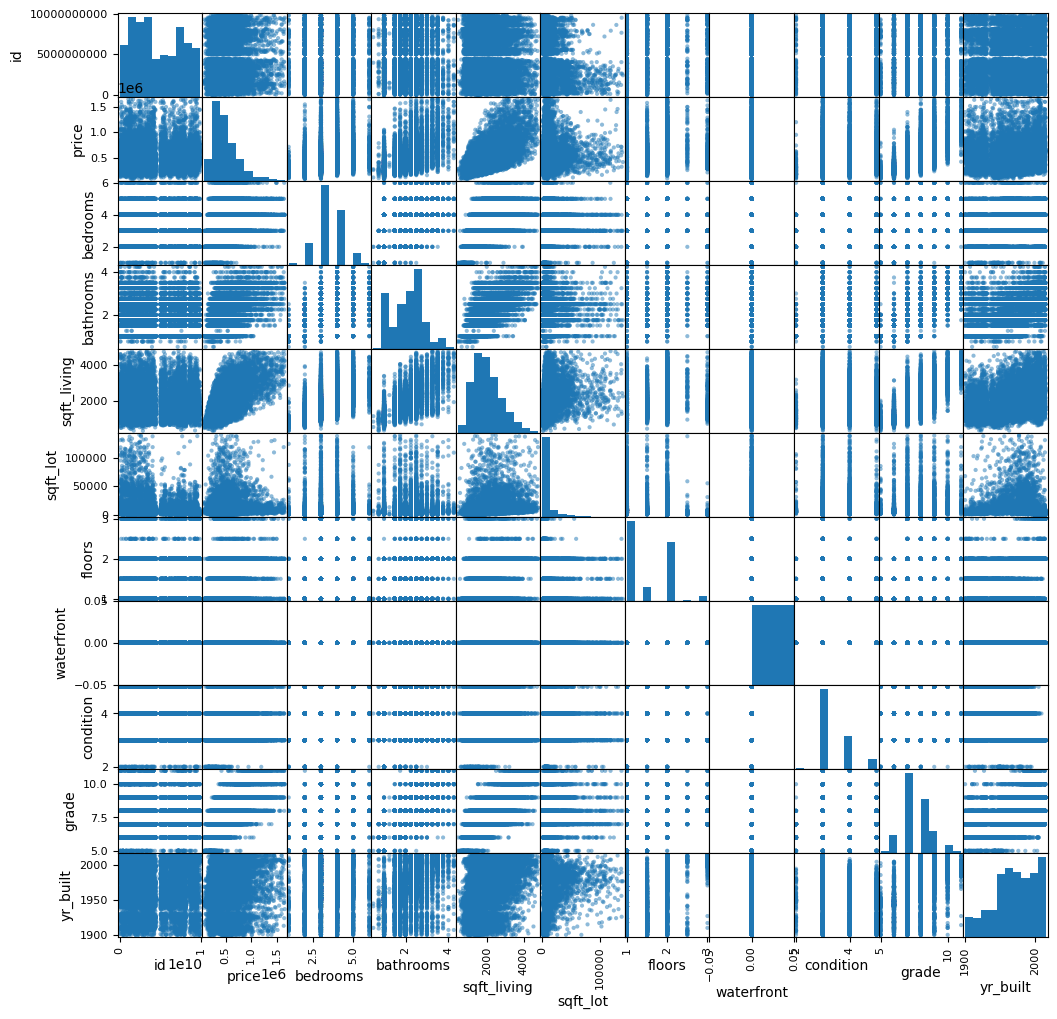

In [52]:
pd.plotting.scatter_matrix(df2_cleaned_preprocessed, figsize=[12, 12]);

In [53]:
df2_cleaned.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,1,-0,0,0,0,-0,0,NaN,-0,0,0
price,-0,1,0,0,1,0,0,NaN,0,1,0
bedrooms,0,0,1,0,1,0,0,NaN,0,0,0
bathrooms,0,0,0,1,1,0,1,NaN,-0,1,1
sqft_living,0,1,1,1,1,0,0,NaN,-0,1,0
sqft_lot,-0,0,0,0,0,1,-0,NaN,0,0,0
floors,0,0,0,1,0,-0,1,NaN,-0,0,0
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,-0,0,0,-0,-0,0,-0,NaN,1,-0,-0
grade,0,1,0,1,1,0,0,NaN,-0,1,0


In [54]:
# I have used a moderate threshold to capture a broader range of correlations 
abs(df2_cleaned_preprocessed.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,True,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False
waterfront,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False
grade,False,False,False,False,False,False,False,False,False,True,False


In [55]:
df2_cleaned = df2_cleaned_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df2_cleaned['pairs'] = list(zip(df2_cleaned.level_0, df2_cleaned.level_1))
df2_cleaned.set_index(['pairs'], inplace = True)
df2_cleaned.drop(columns=['level_1', 'level_0'], inplace = True)
# cc for correlation coefficient
df2_cleaned.columns = ['cc']
df2_cleaned.drop_duplicates(inplace=True)
df2_cleaned[(df2_cleaned.cc>.75) & (df2_cleaned.cc<1)]

,cc
pairs,


In [56]:
# There are no sets of variales that are highly correlated.
# Which suggests to me there is no Multicollinearity between my variables .

# Therefore I will not be removing any desired variables here. 

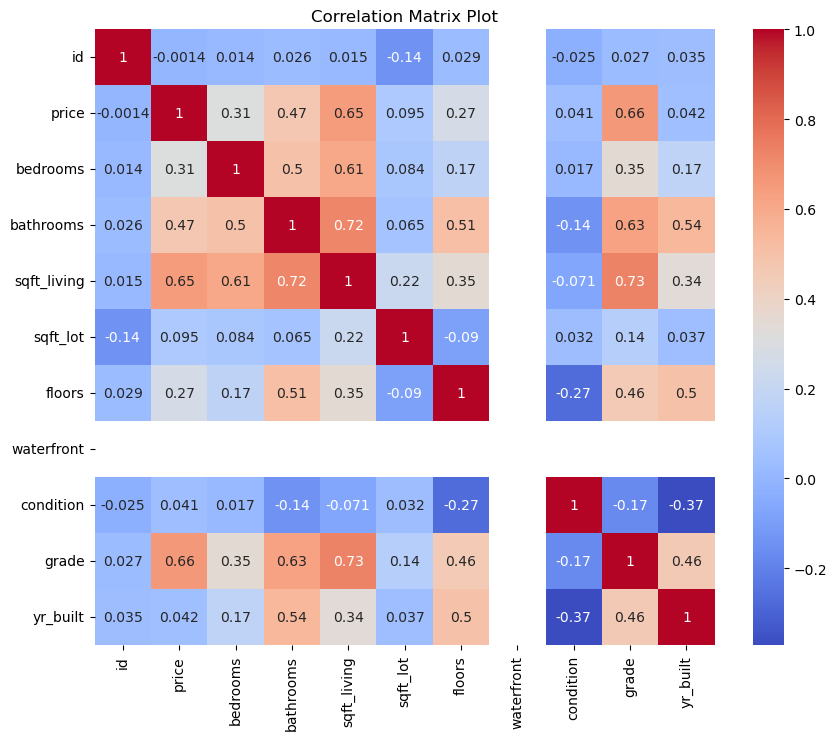

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load your dataset into a pandas DataFrame
df2_cleaned = pd.read_csv('data/cleaned_data_outliers_removed.csv')
# Compute the correlation matrix
correlation_matrix = df2_cleaned.corr()
# Create a correlation matrix plot using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Plot')
plt.show()

In [58]:
# Loaded my DataFrame
df2_cleaned = pd.read_csv('data/cleaned_data_outliers_removed.csv')
# List the desired variables to remove
unwanted_variables = ['id','floors', 'waterfront', 'condition','grade', 'yr_built']
# Remove the desired variables from the DataFrame
df_filtered = df2_cleaned.drop(unwanted_variables, axis=1)
# Display the filtered DataFrame
df_filtered.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,"538,000",3,2,2570,7242
1,"604,000",4,3,1960,5000
2,"510,000",3,2,1680,8080
3,"229,500",3,1,1780,7470
4,"323,000",3,2,1890,6560


In [59]:
# I have chosen to remove the variables above as the earlier analysis suggested that they were the least helpful 
# in determining the price changes from their involvement in the models.  

In [60]:
df2_cleaned = pd.read_csv('data/cleaned_data_outliers_removed.csv')
df_filtered.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,"538,000",3,2,2570,7242
1,"604,000",4,3,1960,5000
2,"510,000",3,2,1680,8080
3,"229,500",3,1,1780,7470
4,"323,000",3,2,1890,6560


In [61]:
from statsmodels.formula.api import ols

In [62]:
# Define the outcome and predictor variables
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
predictors = '+'.join(x_cols)
# Create the formula for the regression model
formula = outcome + '~' + predictors
# Fit the regression model
model = ols(formula=formula, data=df_filtered).fit()
# Display the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     2835.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:00:38   Log-Likelihood:            -1.9854e+05
No. Observations:               14634   AIC:                         3.971e+05
Df Residuals:                   14629   BIC:                         3.971e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.559e+05   6671.985     23.372      0.000    1.43e+05    1.69e+05
bedrooms    -3.937e+04   2312.834    -17.024      0.000   -4.39e+04   -3.48e+04
bathrooms    6600.0956   3251.083      2.030      0.042     227.563     1.3e+04
sqft_living   236.3298      3.256     72.592      0.000     229.948     242.711
sqft_lot       -1.0645      0.119     -8.978      0.000      -1.297      -0.832
==============================================================================
Omnibus:                     2414.442   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5230.988
Skew:                           0.973   Prob(JB):                         0.00
Kurtosis:                       5.188   Cond. No.                     7.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

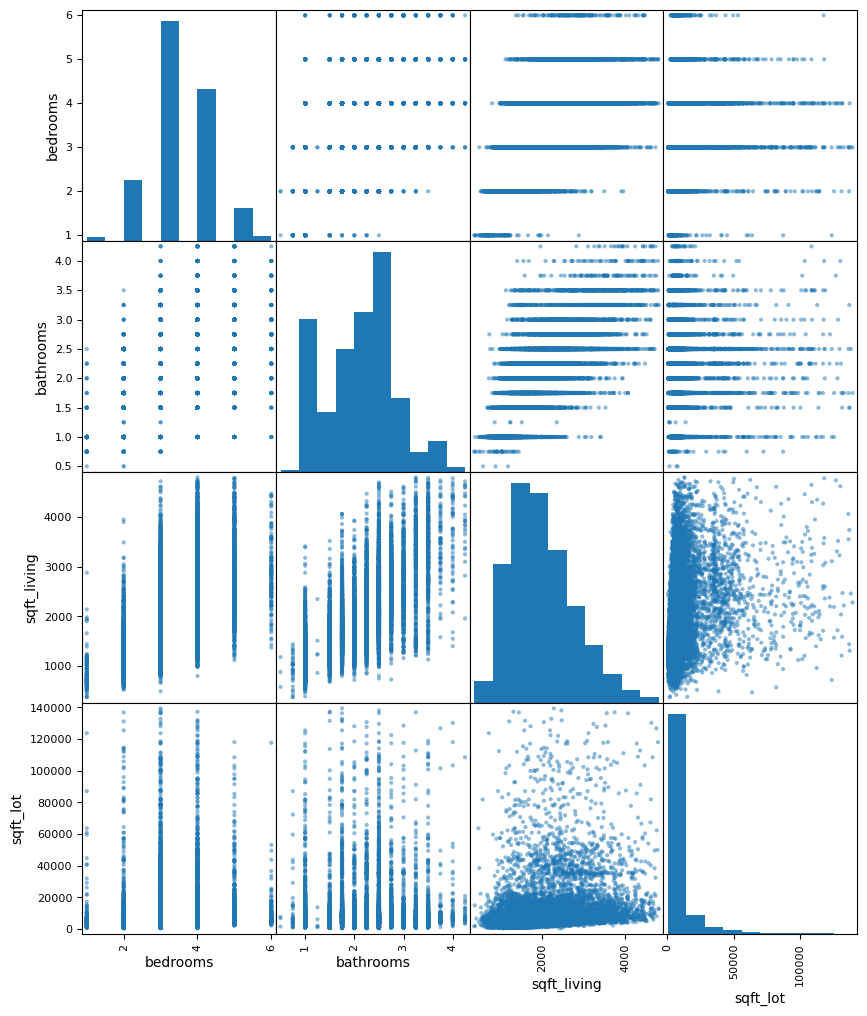

In [63]:
pd.plotting.scatter_matrix(df_filtered[x_cols], figsize=(10,12));

/var/folders/qc/f1rjwz35325dp3rqxh61cf180000gn/T/ipykernel_27713/762412792.py:2: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


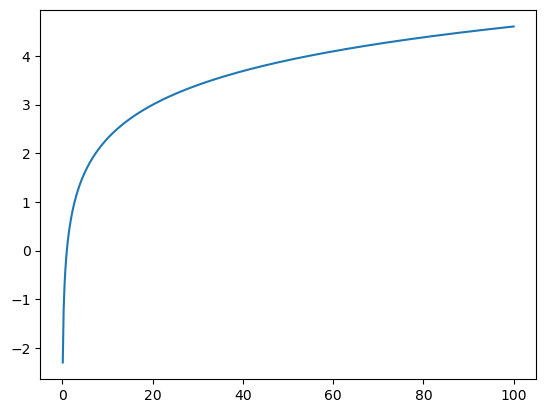

In [64]:
x = np.linspace(start=-100, stop=100, num=10**3)
y = np.log(x)
plt.plot(x, y);

In [65]:
# Define the outcome and predictor variables
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
predictors = '+'.join(x_cols)
# Create the formula for the regression model
formula = outcome + '~' + predictors
# Fit the regression model
model = ols(formula=formula, data=df_filtered).fit()
# Display the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     2835.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:00:42   Log-Likelihood:            -1.9854e+05
No. Observations:               14634   AIC:                         3.971e+05
Df Residuals:                   14629   BIC:                         3.971e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.559e+05   6671.985     23.372      0.000    1.43e+05    1.69e+05
bedrooms    -3.937e+04   2312.834    -17.024      0.000   -4.39e+04   -3.48e+04
bathrooms    6600.0956   3251.083      2.030      0.042     227.563     1.3e+04
sqft_living   236.3298      3.256     72.592      0.000     229.948     242.711
sqft_lot       -1.0645      0.119     -8.978      0.000      -1.297      -0.832
==============================================================================
Omnibus:                     2414.442   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5230.988
Skew:                           0.973   Prob(JB):                         0.00
Kurtosis:                       5.188   Cond. No.                     7.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# I ran log transformations and they had no effect on the model summary. 

In [67]:
# Recording my coefficients here 

#  When all the predictor variables bedrooms, bathrooms, sqft_living, and sqft_lot are zero, 
# the average price is approximately $155,900.

# For each additional bedroom, the price is estimated to decrease by approximately $39,370.
# For each additional bathroom, the price is estimated to increase by approximately $6,600.
# For each additional square foot of living space, the price is estimated to increase by approximately $236.
# For each additional square foot of lot size, the price is estimated to decrease by approximately $1.06.
# This is under the assumption all other factors remain constant.

In [68]:
import statsmodels.api as sm
# Loaded my dataframe
df2_cleaned = pd.read_csv('data/cleaned_data_outliers_removed.csv')
# Define the dependent variable
y = df2['price']
# Define the independent variables 
X = df2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]
# Add a constant term to the independent variables matrix
X = sm.add_constant(X)
# Create the OLS model
model = sm.OLS(y, X)
# Fit the model to the data
results = model.fit()
# Display the summary of the regression results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     4102.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:00:42   Log-Likelihood:            -2.1425e+05
No. Observations:               15429   AIC:                         4.285e+05
Df Residuals:                   15424   BIC:                         4.285e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.181e+04   8275.979      8.677      0.000    5.56e+04     8.8e+04
bedrooms    -6.081e+04   2768.381    -21.966      0.000   -6.62e+04   -5.54e+04
bathrooms    4343.8645   4196.801      1.035      0.301   -3882.359    1.26e+04
sqft_living   322.1246      3.721     86.573      0.000     314.831     329.418
sqft_lot       -0.3834      0.051     -7.557      0.000      -0.483      -0.284
==============================================================================
Omnibus:                    10555.927   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           394786.723
Skew:                           2.801   Prob(JB):                         0.00
Kurtosis:                      27.139   Cond. No.                     1.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

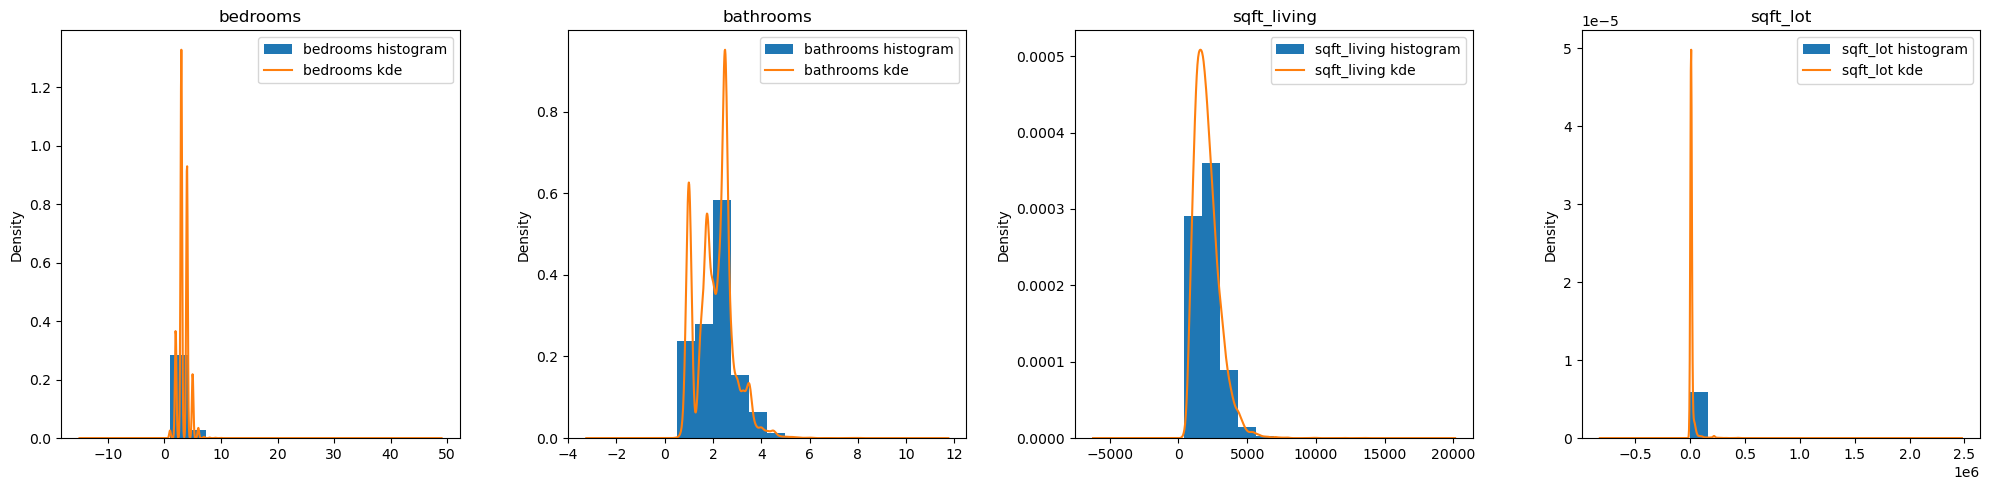

In [69]:
import scipy.stats as stats
import matplotlib.pyplot as plt
# Load my dataframe
df2_cleaned = pd.read_csv('data/cleaned_data_outliers_removed.csv')
# Define my independent variables
independent_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
# Create subplots for each independent variable
fig, axs = plt.subplots(1, len(independent_variables), figsize=(5 * len(independent_variables), 5))
# Iterate over each independent variable
for i, var in enumerate(independent_variables):
    ax = axs[i]
 # Histogram with KDE
    df2[var].plot.hist(density=True, ax=ax, label=var + ' histogram')
    df2[var].plot.kde(ax=ax, label=var + ' kde')
    ax.legend()
    ax.set_title(var)
# Adjust spacing of subplots
plt.tight_layout()
# Display the plots
plt.show()

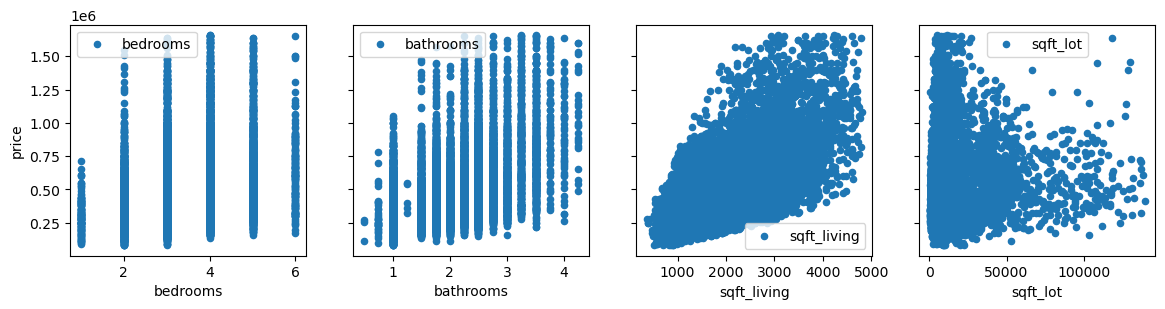

In [70]:
import matplotlib.pyplot as plt

# Visualizing the relationship between the predictors and the target using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(14, 3))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']):
    df_filtered.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

In [71]:
# Building the formula 
f = 'price~bathrooms'
# Create a fitted model in one line
model = smf.ols(formula=f, data=df2_cleaned).fit()

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     4180.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:00:47   Log-Likelihood:            -2.0090e+05
No. Observations:               14634   AIC:                         4.018e+05
Df Residuals:                   14632   BIC:                         4.018e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.485e+05   5727.034     25.926      0.000    1.37e+05     1.6e+05
bathrooms   1.696e+05   2622.514     64.655      0.000    1.64e+05    1.75e+05
==============================================================================
Omnibus:                     2941.229   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6229.384
Skew:                           1.178   Prob(JB):                         0.00
Kurtosis:                       5.159   Cond. No.                         8.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

   bathrooms
0          0
1          8
0     233,257
1   1,504,937
dtype: float64


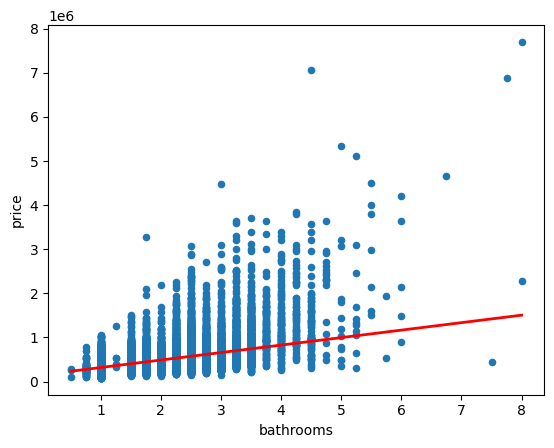

In [73]:
# Create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'bathrooms': [df2.bathrooms.min(), df2.bathrooms.max()]})
print(X_new.head())
# make predictions for those x values and store them
preds = model.predict(X_new)
print (preds)
# first, plot the observed data and the least squares line
df2.plot(kind='scatter', x='bathrooms', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

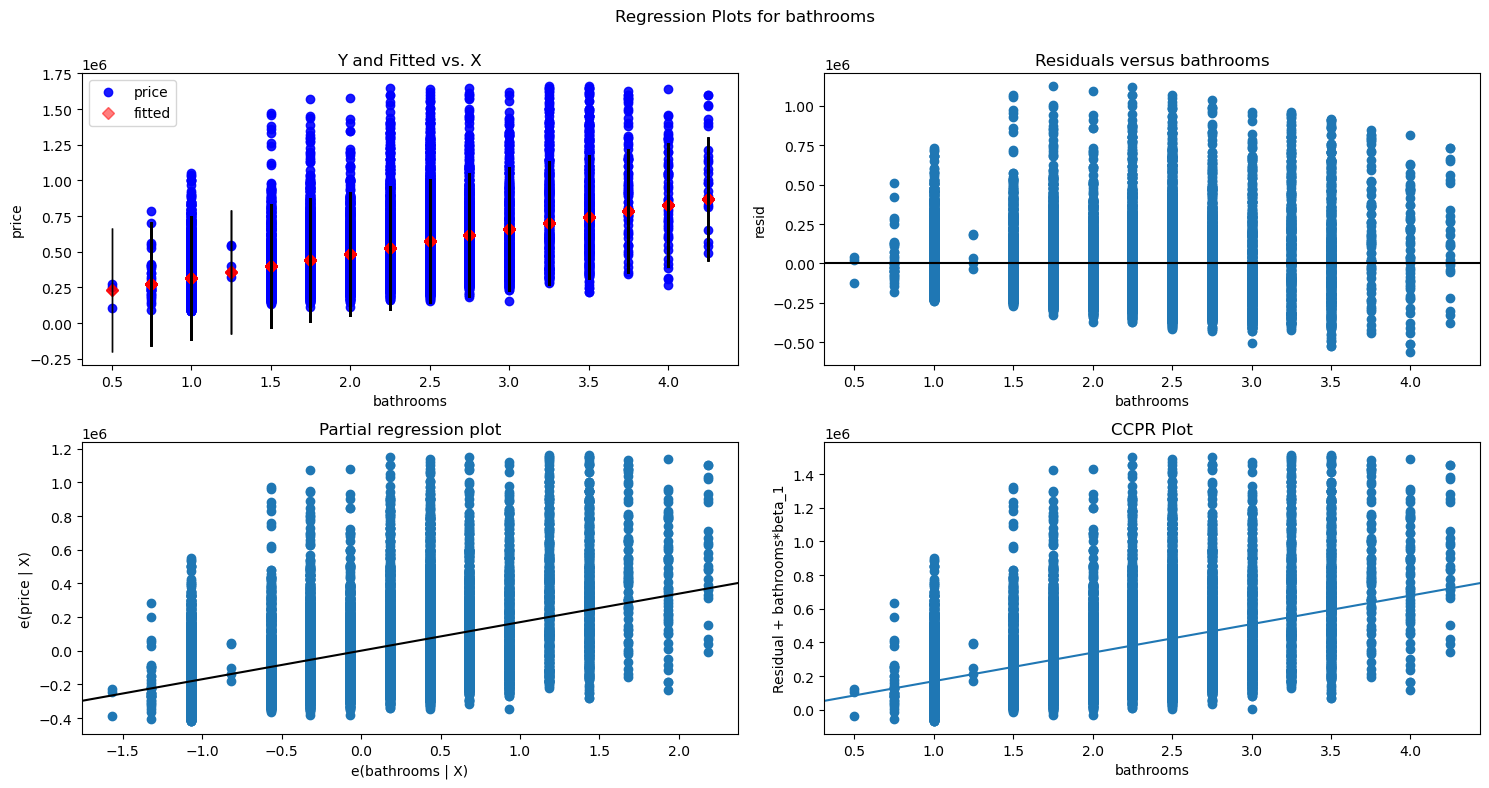

In [74]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()

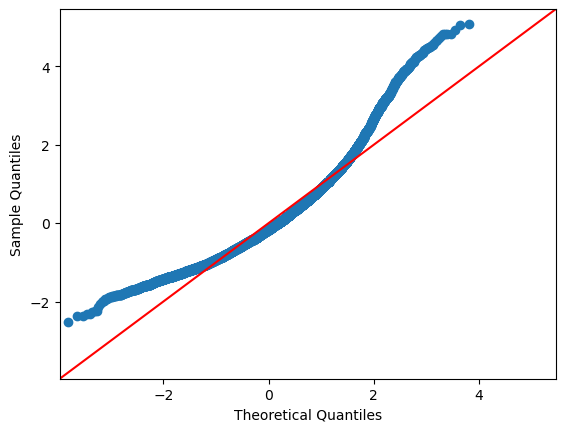

In [75]:
import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

R-Squared: 0.09798571799828482
Intercept   191,434
bedrooms     92,079
dtype: float64


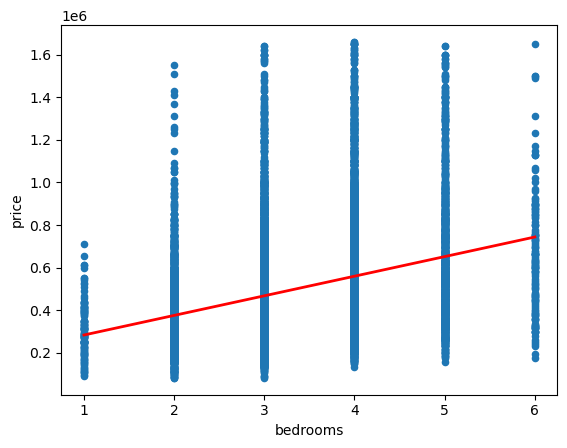

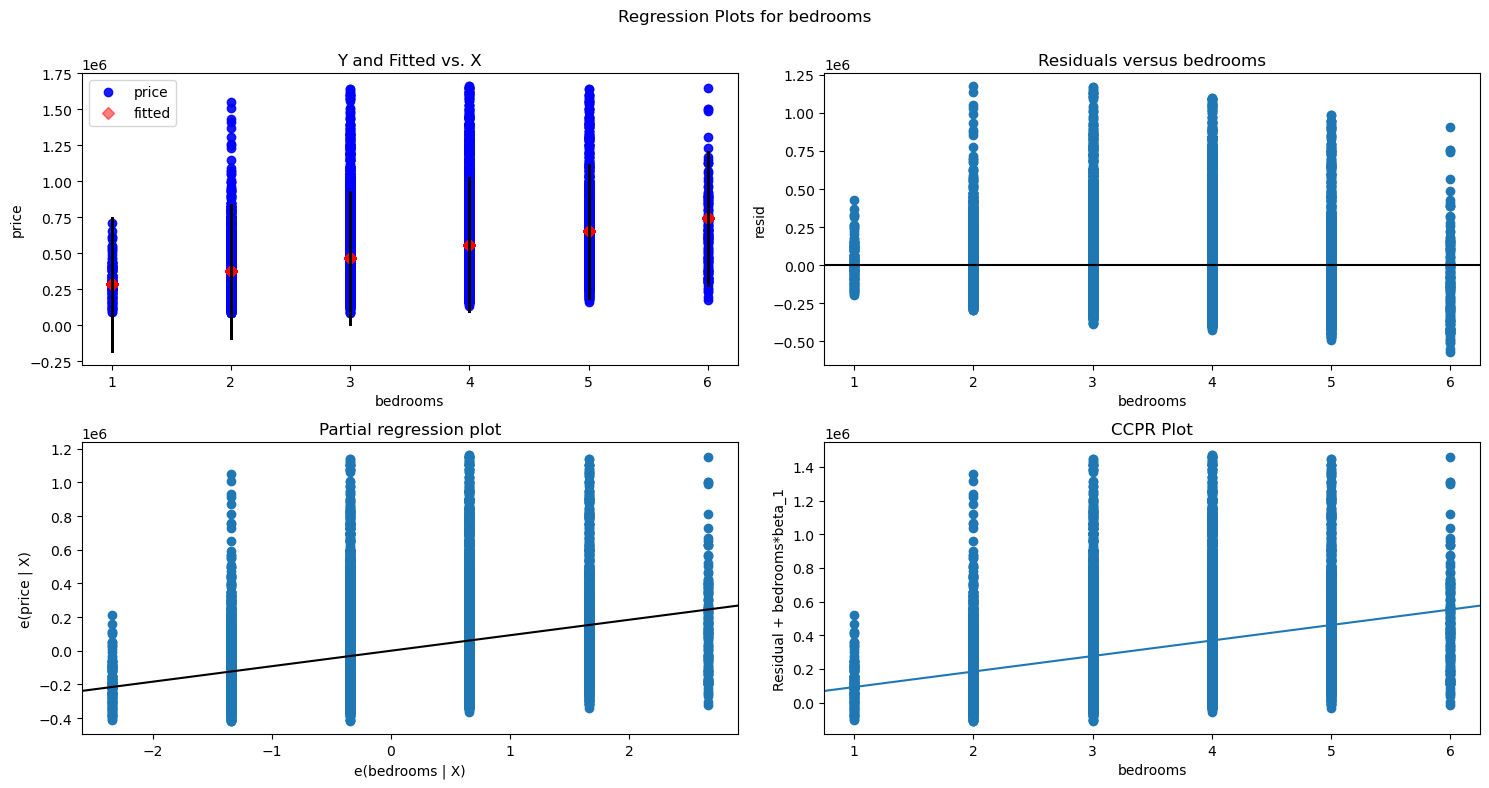

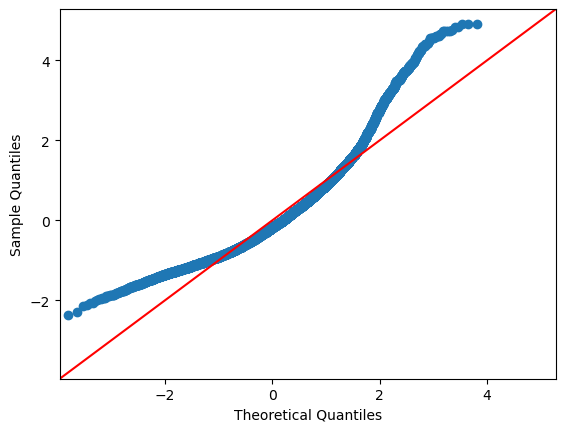

In [76]:
f = 'price~bedrooms'
model = smf.ols(formula=f, data=df2_cleaned).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'bedrooms': [df2_cleaned.bedrooms.min(), df2_cleaned.bedrooms.max()]});
preds = model.predict(X_new)
df2_cleaned.plot(kind='scatter', x='bedrooms', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [77]:
# Displaying model summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     1589.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:00:52   Log-Likelihood:            -2.0198e+05
No. Observations:               14634   AIC:                         4.040e+05
Df Residuals:                   14632   BIC:                         4.040e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.914e+05   7969.942     24.020      0.000    1.76e+05    2.07e+05
bedrooms    9.208e+04   2309.592     39.868      0.000    8.76e+04    9.66e+04
==============================================================================
Omnibus:                     3369.024   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7808.991
Skew:                           1.298   Prob(JB):                         0.00
Kurtosis:                       5.463   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""